# Problem 1

### Part F-a

In [9]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Set parameters
R = 1 # placeholder R value
ns = 0.96
keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
D = 1 # at z=0 D=1
A = 1 # We assume this

# Define function for variance of the density field smoothed with spherical top-hat
def variance(k):

  P = A*(D**2)*((k/keq)**ns)*np.exp( (-k/(0.5*keq)) )
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))
  var = (1/(2*(np.pi**2))) * P * (W**2) * (k**2)

  return var

In [11]:
# Calculate variance for multiple values of R (using scipy.integrate.simpson)

R_min = 0
R_max = 1E3
bound_min = -10 # estimating this to be ~0
bound_max = 10 # estimating this to be ~infinity
N=1000
R_array = np.linspace(R_min,R_max,N)
k_array = np.logspace(bound_min,bound_max,N)

In [12]:
Vars = []
for R in R_array:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Vars.append(Var)

<ipython-input-10-e1b822547d0f>:12: RuntimeWarning: divide by zero encountered in divide
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))
<ipython-input-10-e1b822547d0f>:12: RuntimeWarning: invalid value encountered in multiply
  W = (3/((k*R)**3))*(np.sin(k*R)-((k*R)*np.cos(k*R)))


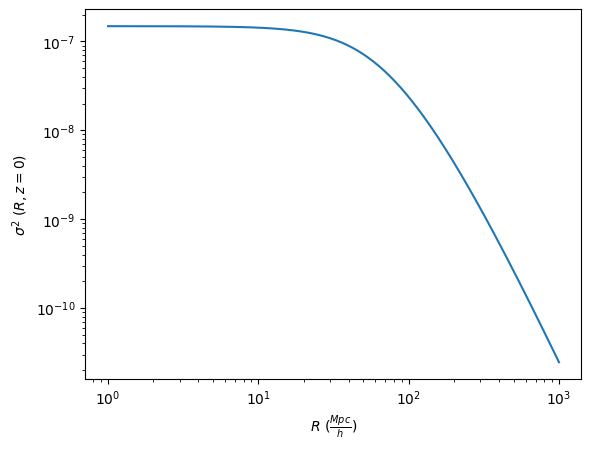

In [13]:
plt.plot(R_array,Vars)
plt.xlabel(r'$ R\ (\frac{Mpc}{h}) $')
plt.ylabel(r"$ \sigma^2 \ (R,z=0) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

### Part F-b

In [14]:
M_min = 0
M_max = 15
M_array = np.logspace(M_min,M_max,N)

rho = 9.9*10**-30 # mean matter density g/cm³ (looked up)
rho = 2.775e11 * 0.3  # mean density of universe in Msun/Mpc^3 (assume Omega_m = 0.3)
Vars = []
for M in M_array:
  R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Vars.append(Var)
sigma = np.array(Vars)**0.5

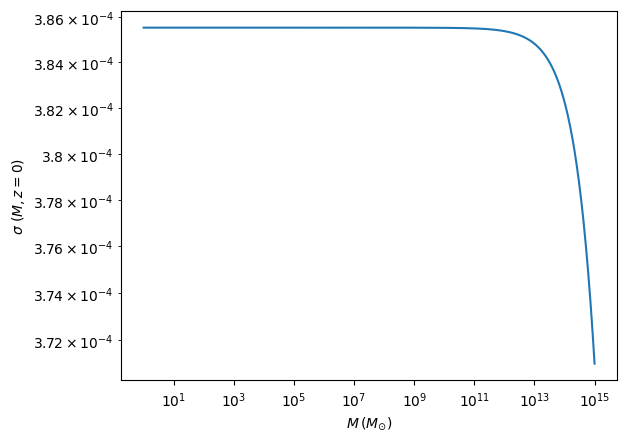

In [15]:
plt.plot(M_array,sigma)
plt.xlabel(r'$ M \, (M_{\odot}) $')
plt.ylabel(r'$ \sigma \ (M, z=0) $')
plt.xscale("log")
plt.yscale("log")
plt.show()

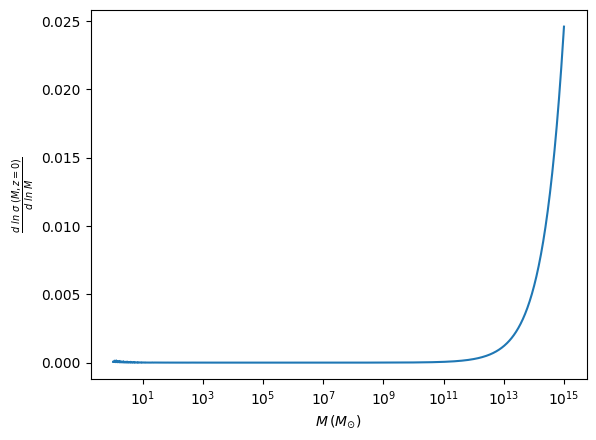

In [16]:
# dln(sigma)/dln(M) using np.diff

dy = np.diff(np.log(sigma))
dx = np.diff(np.log(M_array))
deriv = dy / dx
deriv = np.abs(deriv)

plt.plot(M_array[1:],deriv)
plt.xlabel(r'$ M \, (M_{\odot}) $')
plt.ylabel(r'$ \frac{d\ ln\ \sigma \ (M, z=0) }{d\ ln\ M} $')
plt.xscale("log")
plt.show()

### Part F-c

In [18]:
# solve for A given R, sigma8

R = 8 # h^−1 Mpc # assign new R value for the integral
sigma8 = 0.8
# z = 0 # assumed before

var = variance(k_array)
Var = scipy.integrate.simpson(var, x=k_array)
Var8 = sigma8 ** 2
A = Var8 / Var
print("A: {}".format(A))

A: 4414472.271709754


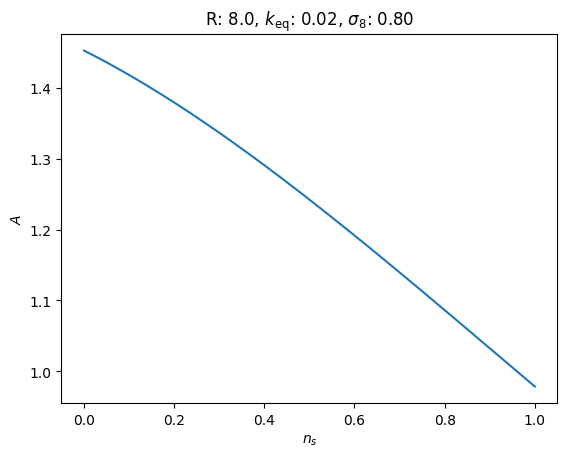

In [19]:
# A vs. ns

NS = np.linspace(0,1,N)
AA = []
for ns in NS:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(NS,AA)
plt.xlabel(r"$ n_s $")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $k_{{\mathrm{{eq}}}}$: {:.2f}, $\sigma_8$: {:.2f}".format(R, keq, sigma8))
plt.show()

A decreases almost linearly with ns!

<ipython-input-10-e1b822547d0f>:11: RuntimeWarning: divide by zero encountered in divide
  P = A*(D**2)*((k/keq)**ns)*np.exp( (-k/(0.5*keq)) )
<ipython-input-10-e1b822547d0f>:11: RuntimeWarning: invalid value encountered in multiply
  P = A*(D**2)*((k/keq)**ns)*np.exp( (-k/(0.5*keq)) )


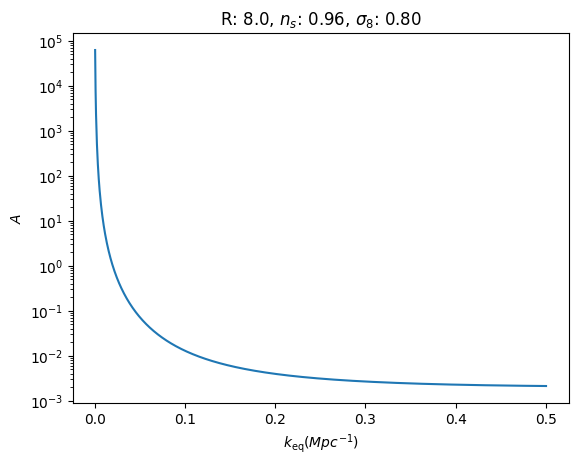

In [20]:
# A vs. keq

ns = 0.96
KEQ = np.linspace(0,0.5,N)
AA = []
for keq in KEQ:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(KEQ,AA)
plt.xlabel("$k_{{\mathrm{{eq}}}} (Mpc^{-1})$")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $n_s$: {:.2f}, $\sigma_8$: {:.2f}".format(R, ns, sigma8))
plt.yscale("log")
plt.show()

A decreases rapidly with keq!

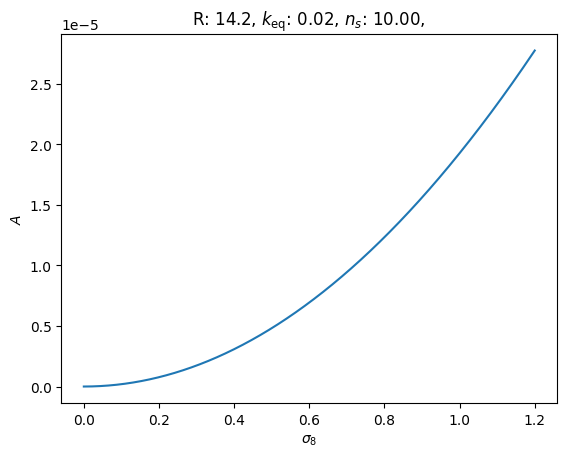

In [24]:
#  A vs. sigma8

keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
SIGMA8 = np.linspace(0,1.2,N)
AA = []
for sigma8 in SIGMA8:
  var = variance(k_array)
  Var = scipy.integrate.simpson(var, x=k_array)
  Var8 = sigma8 ** 2
  AA.append(Var8/Var)

plt.plot(SIGMA8,AA)
plt.xlabel(r"$ \sigma_8 $")
plt.ylabel(r"$ A $")
plt.title(r"R: {:.1f}, $k_{{\mathrm{{eq}}}}$: {:.2f}, $n_s$: {:.2f}, ".format(R, keq, ns))
plt.show()

A increases rapidly with sigma8!

### Part F-d

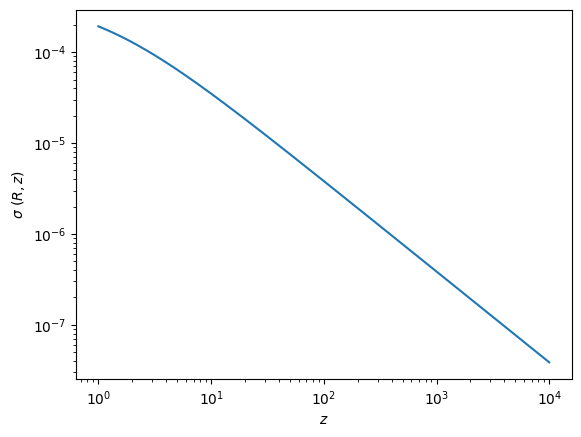

In [25]:
# Set parameters
ns = 0.96
keq = 0.02 # h * Mpc^-1, NOTE!!! h ~ 0.67
D = 1 # at z=0 D=1
A = 1 # We assume this

M = 1E10 # placeholder mass (Msol)
R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
var0 = variance(k_array)
Var0 = scipy.integrate.simpson(var0, x=k_array)
sigma0 = Var0 ** 0.5

z_low = 0
z_high = 4
z = np.logspace(z_low,z_high,N)
sigma_z = sigma0 / (1+z)

plt.plot(z,sigma_z)
plt.xlabel(r"$ z $")
plt.ylabel(r"$ \sigma \ (R,z) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

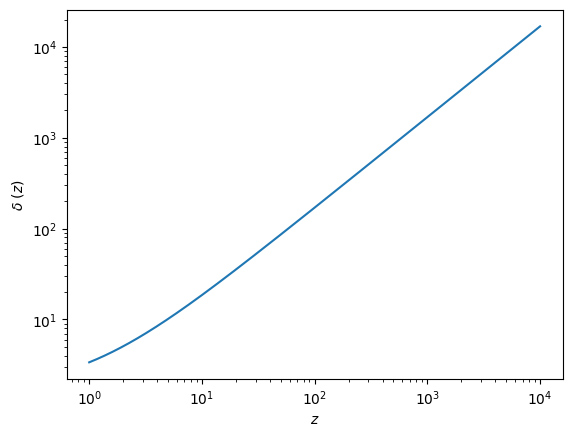

In [26]:
delta0 = 1.686 # looked this up
delta_z = delta0*(1+z)

plt.plot(z,delta_z)
plt.xlabel(r"$ z $")
plt.ylabel(r"$ \delta \ (z) $")
plt.xscale("log")
plt.yscale("log")
plt.show()

delta(z) depends almost linearly with z!

### Part F-e

In [27]:
M_min = 6
M_max = 15
N = 10000
M_array = np.logspace(M_min,M_max,N)
z_s = [0,1,2]

Not sure what my ns and keq should be.... my choice of them affect the value of sigma, which affects the value of n. Made you different choices below and will carry on with the one I like the most.

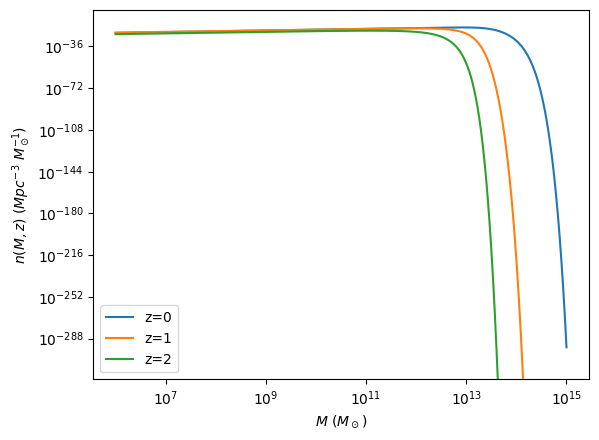

In [28]:
ns = 10
keq = 0.2 # h * Mpc^-1, NOTE!!! h ~ 0.67

for z in z_s:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="z={}".format(z))

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.show()

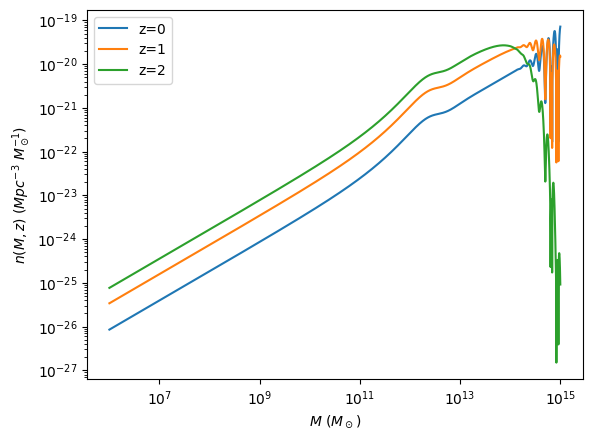

In [29]:
ns = 15
keq = 0.3 # h * Mpc^-1, NOTE!!! h ~ 0.67

for z in z_s:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="z={}".format(z))

plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.show()

<ipython-input-30-81a669387b0f>:10: RuntimeWarning: divide by zero encountered in log
  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))
<ipython-input-30-81a669387b0f>:14: RuntimeWarning: divide by zero encountered in divide
  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv
<ipython-input-30-81a669387b0f>:14: RuntimeWarning: invalid value encountered in multiply
  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv


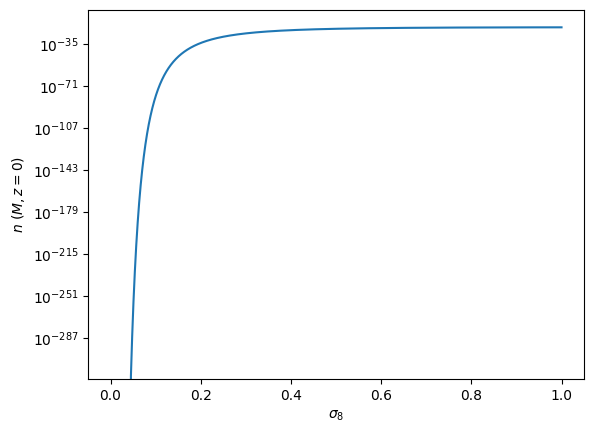

In [30]:
# Vary σ8

z = 0
ns = 10
keq = 0.2 # h * Mpc^-1, NOTE!!! h ~ 0.67

SIGMA8 = np.linspace(0,1,N)
sigma = SIGMA8

deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

delta = delta0*(1+z)

n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

plt.plot(SIGMA8,n)

plt.xlabel(r"$ \sigma_8 $")
plt.ylabel(r"$ n \ (M,z=0) $")
plt.yscale("log")
plt.show()

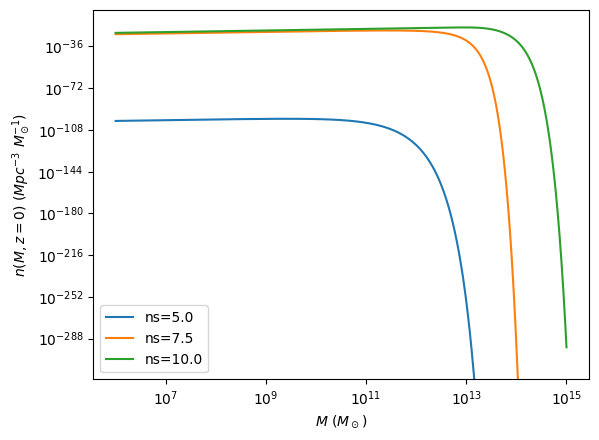

In [31]:
# Vary ns

sigma8 = 0.8
NN=3

NS = np.linspace(5,10,NN)

for ns in NS:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="ns={}".format(round(ns * 10) / 10))

plt.xlabel(r'$M\ (M_\odot)$')
plt.ylabel(r'$n(M, z=0)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

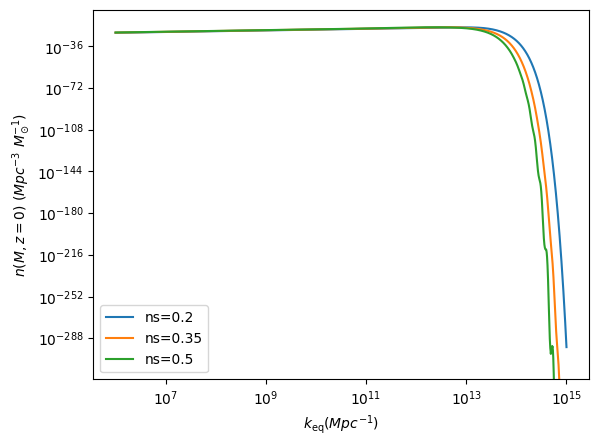

In [32]:
# Vary keq

ns = 10
NN = 3

KEQ = np.linspace(0.2,0.5,NN)
for keq in KEQ:
  Vars = []
  for M in M_array:
    R = ((3*M) / (4*np.pi*rho))**(1/3) # assign new R value for the integral
    var = variance(k_array)
    Var = scipy.integrate.simpson(var, x=k_array)
    Vars.append(Var)
  sigma = (np.array(Vars)**0.5) / (1+z)

  deriv = np.abs(np.gradient(np.log(sigma), np.log(M_array)))

  delta = delta0*(1+z)

  n = np.sqrt(2/np.pi) * (rho/(M**2)) * (delta/sigma) * np.exp(-0.5*((delta/sigma)**2)) * deriv

  plt.plot(M_array,n,label="ns={}".format(round(keq, 3)) )

plt.xlabel("$k_{{\mathrm{{eq}}}} (Mpc^{-1})$")
plt.ylabel(r'$n(M, z=0)\ (Mpc^{-3}\ M_\odot^{-1})$')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()